# **Optimización de conjuntos de datos para ML**

## Autor

Manuel Gómez-Plana Rodríguez - 100472310

# **1. Introducción**
<a href="introduction"> </a>

Este *notebook* contiene toda la documentación con la realización de la práctica "Optimización de conjuntos de datos para ML" perteneciente a la asignatura Inteligencia Artificial de Inspiración Biológica del Máster Universitario en Ciencia y Tecnología Informática de la Universidad Carlos III de Madrid. Esta práctica consiste en emplear distintos algoritmos de IA con inspiración biológica con el fin de optimizar un conjunto de datos para mejorar los resultados obtenidos por un modelo base en una tarea supervisada. Para explicar el desarrollo llevado a cabo, este documento se estructura en los siguientes apartados:

1. [**Introducción**](#introduction): introducción al contexto de la práctica y del documento.
2. [**Datos**](#data): explicación del conjunto de datos a usar y cargado del mismo.
3. [**Modelo base**](#base-model): exploración y elección del modelo base a utilizar en la práctica.
    - 3.1. [**Regresión lineal**](#linear-regression): implementación mediante un modelo de regresión lineal. 
    - 3.2. [**Árboles de decisión**](#decision-trees): implementación mediante un modelo de árboles de decisión.
    - 3.3. [**SVR**](#SVR): implementación mediante un modelo de SVR.
    - 3.4. [**Elección del mejor modelo**](base-model-election): comparación y decisión del modelo base.
5. [**Desarrollo**](#development): exploración e implementación de las distintas técnicas de inspiración biológica para mejorar el conjunto de datos.
    - 4.1. [**Síntesis de atributos**](#synthesis): procesos relacionados con la creación de nuevos atributos.
    - 4.2. [**Eliminación de atributos**](#delete): procesos relacionados con la eliminación de atributos.
6. [**Resultados**](#results): análisis de los resultados obtenidos de manera global.
7. [**Conclusiones**](#conclusion): pensamientos finales sobre el desarrollo de la práctica.

Esta práctica se ha llevado a cabo empleando el lenguaje de programación `Python` y la librería de ML `scikit-learn`. Todas las librerías necesarias se importan a continuación:

In [1]:
import sklearn as sk             # Algoritmos de ML
import pandas as pd              # Análisis de datos
from time import time            # Medidas temporales
import matplotlib.pyplot as plt  # Representación gráfica

# **2. Datos**
<a href="data"></a>

El primer paso necesario en esta práctica es analizar los datos. El dataset utilizado en esta práctica para entrenar al modelo base es el presente en Aula Global, "Diabetes.csv". Para analizar este `csv`, se emplea la librería de Python `pandas`, mediante el siguiente código.:

In [2]:
data = pd.read_csv("Diabetes.csv", sep=",")
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Como se puede observar, el dataset contiene 442 filas y 11 columnas. Los atributos del mismo son:

- **age**: determina la edad de la persona.
- **sex**: determina el sexo de la persona.
- **bmi**: determina el índice de masa corporal de la persona.
- **bp**: determina la presión sanguínea de la persona.
- **s1-s6**: análisis sanguíneo de las personas, como explica [Microsoft](https://learn.microsoft.com/es-es/azure/open-datasets/dataset-diabetes?tabs=azureml-opendatasets)
- **target**: índice que determina el avance de la diabetes 1 año después de la medida, como explica [Microsoft](https://learn.microsoft.com/es-es/azure/open-datasets/dataset-diabetes?tabs=azureml-opendatasets). Este atributo es la variable objetivo que buscará optimizar el modelo de ML.

Aparentemente, todos los atributos menos el objetivo han sido normalizados. Esto se observa mejor en el siguiente código:

In [3]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-7.284269e-18,2.348549e-17,-2.087320e-16,-4.571507e-17,-9.293722e-18,4.420798e-17,2.135044e-18,2.913707e-17,9.143013e-17,1.431736e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Con el siguiente código, se puede observar que los datos no contienen valores nulos, y que no hay que realizar ninguna tarea de limpiado de datos previa al modelo.

In [4]:
print(data.isnull().any()) # Checks if any column contains NaN

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool


Una vez analizados los datos a emplear, se procede a buscar el modelo base adecuado

# **3. Modelo base**
<a href="base-model"></a>

Este apartado contiene una búsqueda del modelo base adecuado a emplear en la práctica. Existe una serie de características que el modelo base ha de cumplir:

- El modelo base debe ser capaz de ser entrenado para una tarea de regresión.
- Es favorable que el modelo base pueda ser entrenado en un tiempo relativamente corto, ya que se realizarán muchos entrenamientos del mismo.
- Es favorable que el modelo base no proporcione un resultado excesivamente bueno, ya que el objetivo de la práctica es mejorar los resultados simplemente mediante algoritmos aplicados a los datos.

Teniendo estas características en cuenta, se ha decidido escoger 3 modelos base posibles, que serán evaluados para escoger el que mejor se adecúe a estas restricciones. Estos modelos son: regesión lineal, árboles de decisión y SVR (SVMs aplicados regresión). Antes de entrenar los modelos, se hace la división de los datos entre *train* y *test* mediante el siguiente código:

In [5]:
train, test = sk.model_selection.train_test_split(data, shuffle=False)

# Datos para el entrenamiento
X_train = train.drop(["target"], axis="columns")
Y_train = train[["target"]]

# Datos para la validación
X_test = test.drop(["target"], axis="columns")
Y_test = test[["target"]]

Para validar los modelos, se realizará un análisis de los resultados mediante: el MAE, el MSE y el RSME; importados en el siguiente código:

In [6]:
from sklearn.metrics import mean_absolute_error    # MAE
from sklearn.metrics import mean_squared_error     # MSE
import numpy as np                                 # Usado para calcular el RSME

## **3.1. Regresión lineal**
<a href="linear-regression"></a>

El primer modelo a entrenar es una regresión lineal. Para construir el modelo, se ha empleado la librería `scikit-learn` y se han obtenido las medidas temporales de su entrenamiento mediante la librería `time` de Python.

In [7]:
# Creación del modelo
linear_regressor = sk.linear_model.Ridge(alpha=.5)
linear_regressor

,alpha,0.5
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [8]:
# Entrenamiento del modelo
start = time()
linear_regressor.fit(X_train, Y_train)
end = time()

# Cálculo del tiempo empleado en el entrenamiento
lr_time = end - start

# Uso del modelo
y_pred = linear_regressor.predict(X_test)

# Cálculo de los errores
lr_mae = mean_absolute_error(Y_test, y_pred)
lr_mse = mean_squared_error(Y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)

# Impresión de los resultados
print("====== Regresión Lineal ======\n")
print(f"Tiempo de entrenamiento: {lr_time} segundos\n")
print(f"MAE={lr_mae}")
print(f"MSE={lr_mse}")
print(f"RMSE={lr_rmse}")

====== Regresión Lineal ======

Tiempo de entrenamiento: 0.0045623779296875 segundos

MAE=45.93413718645278
MSE=3107.4897667732384
RMSE=55.744863142474735


Los resultados obtenidos se observan mejor mediante el siguiente gráfico generado con la librería `MatPlotLib`:

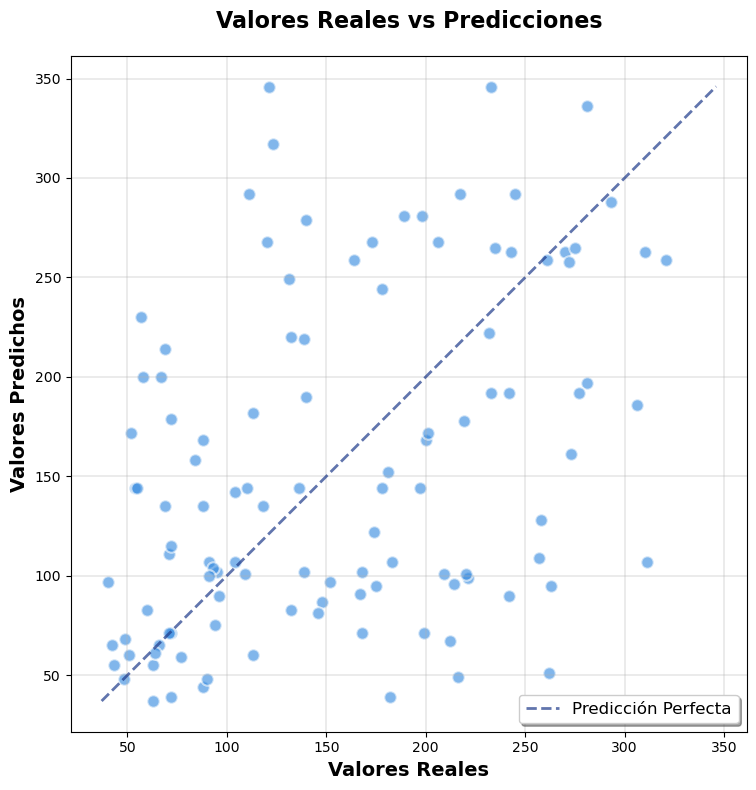

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(Y_test, y_pred, s=80, alpha=0.6, color='#2E86DE', 
          edgecolors='white', linewidth=1.5)

# Línea de predicción perfecta (y=x)
min_val = min(Y_test.min().item(), y_pred.min().item())
max_val = max(Y_test.max().item(), y_pred.max().item())
ax.plot([min_val, max_val], [min_val, max_val], '--', 
        linewidth=2, label='Predicción Perfecta', alpha=0.7, color="#1E3A8A")

ax.set_xlabel('Valores Reales', fontsize=14, fontweight='bold')
ax.set_ylabel('Valores Predichos', fontsize=14, fontweight='bold')
ax.set_title('Valores Reales vs Predicciones', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=1.2)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

## **3.2. Árboles de decisión**
<a href="decision-trees"></a>

El segundo modelo a probar son los árboles de decisión. De la misma manera que con el anterior, se emplean las librerías `scikit-learn` y `time` para entrenar y obtener los resultados temporales del modelo, respectivamente.

In [11]:
# Creación del modelo
decision_tree = sk.tree.DecisionTreeRegressor()
decision_tree

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
# Entrenamiento del modelo
start = time()
decision_tree.fit(X_train, Y_train)
end = time()

# Cálculo del tiempo empleado en el entrenamiento
dt_time = end - start

# Uso del modelo
y_pred = decision_tree.predict(X_test)

# Cálculo de los errores
dt_mae = mean_absolute_error(Y_test, y_pred)
dt_mse = mean_squared_error(Y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)

# Impresión de los resultados
print("====== Árbol de decisión ======\n")
print(f"Tiempo de entrenamiento: {dt_time} segundos\n")
print(f"MAE={dt_mae}")
print(f"MSE={dt_mse}")
print(f"RMSE={dt_rmse}")

====== Árbol de decisión ======

Tiempo de entrenamiento: 0.004913330078125 segundos

MAE=69.06306306306307
MSE=7750.144144144144
RMSE=88.03490298821339


Como se puede observar, el tiempo empleado en el entrenamiento es prácticamente igual al de la regresión lineal, si bien los errores son mayores. Los resultados obtenidos se observan mejor mediante el siguiente gráfico generado con la librería `MatPlotLib`:

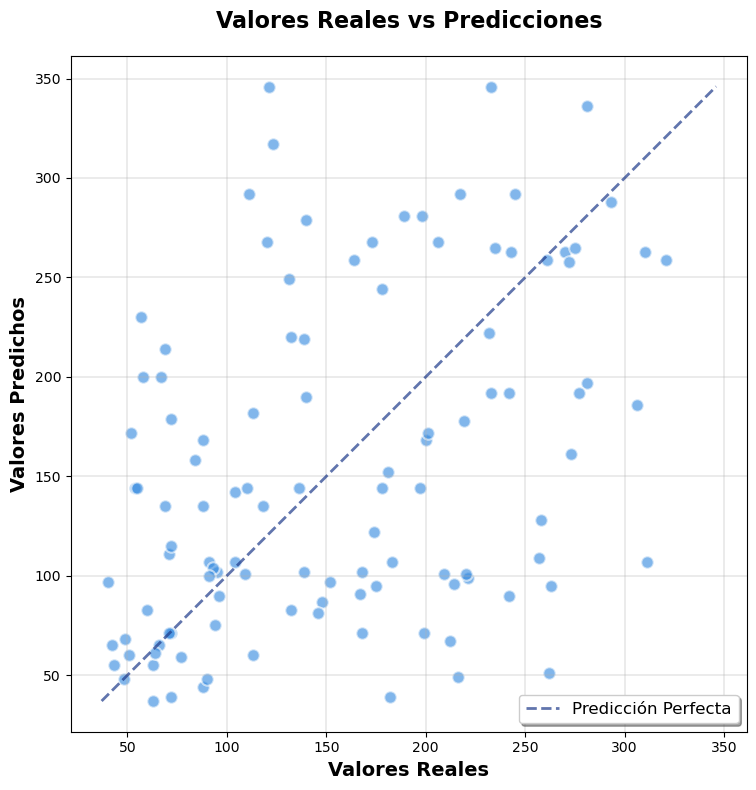

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(Y_test, y_pred, s=80, alpha=0.6, color='#2E86DE', 
          edgecolors='white', linewidth=1.5)

# Línea de predicción perfecta (y=x)
min_val = min(Y_test.min().item(), y_pred.min().item())
max_val = max(Y_test.max().item(), y_pred.max().item())
ax.plot([min_val, max_val], [min_val, max_val], '--', 
        linewidth=2, label='Predicción Perfecta', alpha=0.7, color="#1E3A8A")

ax.set_xlabel('Valores Reales', fontsize=14, fontweight='bold')
ax.set_ylabel('Valores Predichos', fontsize=14, fontweight='bold')
ax.set_title('Valores Reales vs Predicciones', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=1.2)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

## **3.3. SVR**
<a href="SVR"></a>

El tercer modelo a probar son los SVR, una especificación de las SVM que permite emplearlas para un problema de regresión. De la misma manera que con los modelos anteriores, se emplean las librerías `scikit-learn` y `time` para entrenar y obtener los resultados temporales del modelo, respectivamente.

In [15]:
# Creación del modelo
svr = sk.svm.SVR()
svr

,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [26]:
# Entrenamiento del modelo
start = time()
svr.fit(X_train, Y_train.values.ravel())
end = time()

# Cálculo del tiempo empleado en el entrenamiento
svr_time = end - start

# Uso del modelo
y_pred = svr.predict(X_test)

# Cálculo de los errores
svr_mae = mean_absolute_error(Y_test, y_pred)
svr_mse = mean_squared_error(Y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)

# Impresión de los resultados
print("====== SVR ======\n")
print(f"Tiempo de entrenamiento: {svr_time} segundos\n")
print(f"MAE={svr_mae}")
print(f"MSE={svr_mse}")
print(f"RMSE={svr_rmse}")

====== SVR ======

Tiempo de entrenamiento: 0.011753082275390625 segundos

MAE=61.73818703582849
MSE=5272.198646633668
RMSE=72.6099073586633


Como se puede observar, el tiempo empleado en el entrenamiento es algo superior al resto de modelos, si bien es un aumento despreciable. Los resultados obtenidos se observan mejor mediante el siguiente gráfico generado con la librería `MatPlotLib`:

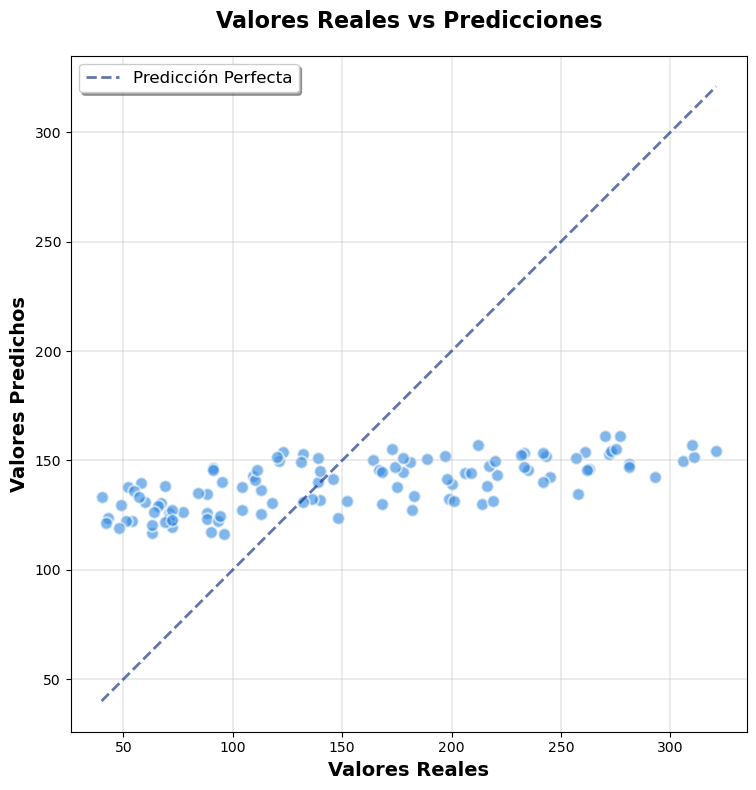

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(Y_test, y_pred, s=80, alpha=0.6, color='#2E86DE', 
          edgecolors='white', linewidth=1.5)

# Línea de predicción perfecta (y=x)
min_val = min(Y_test.min().item(), y_pred.min().item())
max_val = max(Y_test.max().item(), y_pred.max().item())
ax.plot([min_val, max_val], [min_val, max_val], '--', 
        linewidth=2, label='Predicción Perfecta', alpha=0.7, color="#1E3A8A")

ax.set_xlabel('Valores Reales', fontsize=14, fontweight='bold')
ax.set_ylabel('Valores Predichos', fontsize=14, fontweight='bold')
ax.set_title('Valores Reales vs Predicciones', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=1.2)
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

Pese a que los errores no sean tan distintos al resto de modelos, los resultados obtenidos distan mucho a los de los primeros modelos, ya que el SVR siempre predice valores parecidos, por lo que no se parecen realmente a los reales. Si bien esto se podría mermar con una optimización de hiperparámetros, se cree que el objetivo de la práctica no es mejorar el modelo sino los datos, por lo que no se realizará dicha optimización.

## **3.4. Elección del mejor modelo**
<a href="base-model-election"></a>

Una vez que se han presentado los tres modelos base y sus resultados, es momento de elegir el que se va a emplear. Para ello, es necesario compararlos en base a las tres métricas establecidas anteriormente. Ya que todos pueden ser usados para regresión, se tendrá solamente en cuenta el tiempo de entrenamiento y los resultados obtenidos. Para realizarlo de manera gráfica, se presenta el siguiente código:

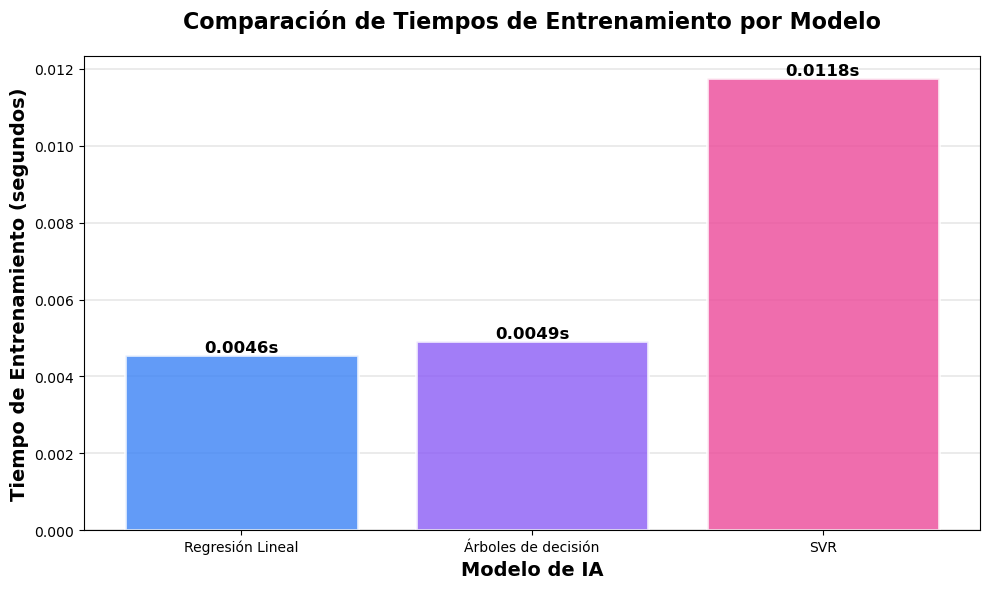

In [28]:
# Datos
modelos = ["Regresión Lineal", "Árboles de decisión", "SVR"]
tiempos = [lr_time, dt_time, svr_time]  # Sustituye con tus variables de tiempo
colores = ['#3B82F6', '#8B5CF6', '#EC4899']  # Azul, Púrpura, Rosa

# Creación del gráfico
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(modelos, tiempos, color=colores, alpha=0.8, 
              edgecolor='white', linewidth=2)

# Labels y título
ax.set_xlabel('Modelo de IA', fontsize=14, fontweight='bold')
ax.set_ylabel('Tiempo de Entrenamiento (segundos)', fontsize=14, fontweight='bold')
ax.set_title('Comparación de Tiempos de Entrenamiento por Modelo', 
             fontsize=16, fontweight='bold', pad=20)

# Añadir valores encima de las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}s',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Grid y estilo
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=1.2)
ax.set_axisbelow(True)

# Ajustar diseño
plt.tight_layout()
plt.show()

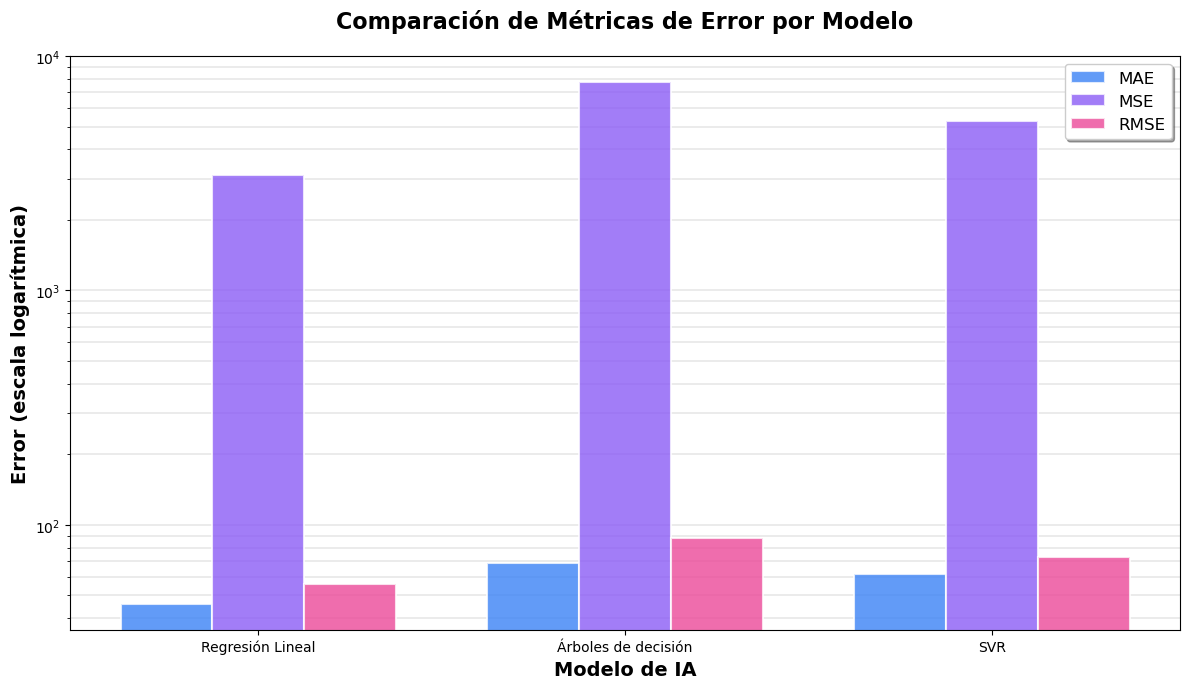

In [29]:
# Datos
modelos = ["Regresión Lineal", "Árboles de decisión", "SVR"]
mae_valores = [lr_mae, dt_mae, svr_mae]  # Sustituye con tus valores
mse_valores = [lr_mse, dt_mse, svr_mse]
rmse_valores = [lr_rmse, dt_rmse, svr_rmse]

# Configuración de las barras
x = np.arange(len(modelos))
width = 0.25

# Colores bonitos para cada métrica
colores = ['#3B82F6', '#8B5CF6', '#EC4899']  # Azul, Púrpura, Rosa

# Creación del gráfico
fig, ax = plt.subplots(figsize=(12, 7))

bars1 = ax.bar(x - width, mae_valores, width, label='MAE', 
               color=colores[0], alpha=0.8, edgecolor='white', linewidth=1.5)
bars2 = ax.bar(x, mse_valores, width, label='MSE', 
               color=colores[1], alpha=0.8, edgecolor='white', linewidth=1.5)
bars3 = ax.bar(x + width, rmse_valores, width, label='RMSE', 
               color=colores[2], alpha=0.8, edgecolor='white', linewidth=1.5)

# Escala logarítmica en Y para manejar diferentes magnitudes
ax.set_yscale('log')

# Labels y título
ax.set_xlabel('Modelo de IA', fontsize=14, fontweight='bold')
ax.set_ylabel('Error (escala logarítmica)', fontsize=14, fontweight='bold')
ax.set_title('Comparación de Métricas de Error por Modelo', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(modelos)

# Leyenda
ax.legend(fontsize=12, frameon=True, shadow=True, fancybox=True)

# Grid
ax.grid(True, alpha=0.3, axis='y', linestyle='-', linewidth=1.2, which='both')
ax.set_axisbelow(True)

# Ajustar diseño
plt.tight_layout()
plt.show()

Como se puede observar, el SVR es el modelo que más tiempo de entrenamiento emplea. Si bien no es una diferencia significativa, esto se suma a que los resultados predichos no siguen la tendencia de los reales y arreglar esto es una tarea que se escapa al alcance de esta práctica. Estos motivos son suficientes para no considerar el SVR como modelo base.

Tanto el modelo de regresión lineal como los árboles de decisión tienen resultados muy parecidos. Ante esto, se ha decidio emplear los árboles de decisión como modelo base, ya que el tener peores resultados que el modelo de regresión lineal permite observar mejor las mejoras realizadas sobre los datos y su impacto en el resultado final.

# **4. Desarrollo**
<a href="development"></a>

## **4.1. Síntesis de atributos**
<a href="synthesis"></a>

## **4.2. Eliminación de atributos**
<a href="delete"></a>

# **5. Resultados**
<a href="results"></a>

# **6. Conclusiones**
<a href="conclusion"></a>